In [1]:
import pandas as pd
import os
import seaborn as sns

In [27]:
features_df = pd.read_csv("missing_features/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
features_df = features_df[(features_df["Method"].isin(["RF+B","SPH", "SPH+CPI", "CPI"]))]
features_df["Method"] = pd.Categorical(features_df["Method"], ['RF+B','SPH', 'SPH+CPI', 'CPI'], ordered=True)
#features_df["Method"] = pd.Categorical(features_df["Method"], ['RF+B','SPH', 'SPH+CPI', 'CPI', 'KMeans', 'GMM', 'Birch','RF'], ordered=True)

,Method,R_e,A@e,RA@e,Run,max info loss,n,f,mf,n_clusters,algorithm,n_components,gini,p value
20,SPH,1,0.283333,1.000000,1,0.1,1050,100,0.0,NaN,NaN,NaN,NaN,NaN
21,SPH,2,0.453333,1.375000,1,0.1,1050,100,0.0,NaN,NaN,NaN,NaN,NaN
22,SPH,3,0.556667,1.676647,1,0.1,1050,100,0.0,NaN,NaN,NaN,NaN,NaN
23,SPH,4,0.636667,1.968586,1,0.1,1050,100,0.0,NaN,NaN,NaN,NaN,NaN
24,SPH,5,0.693333,2.216346,1,0.1,1050,100,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,CPI,6,0.616667,2.610811,1,NaN,1050,100,0.4,NaN,NaN,NaN,0.4,0.9
11966,CPI,7,0.646667,2.814433,1,NaN,1050,100,0.4,NaN,NaN,NaN,0.4,0.9
11967,CPI,8,0.663333,2.944724,1,NaN,1050,100,0.4,NaN,NaN,NaN,0.4,0.9
11968,CPI,9,0.683333,3.121951,1,NaN,1050,100,0.4,NaN,NaN,NaN,0.4,0.9


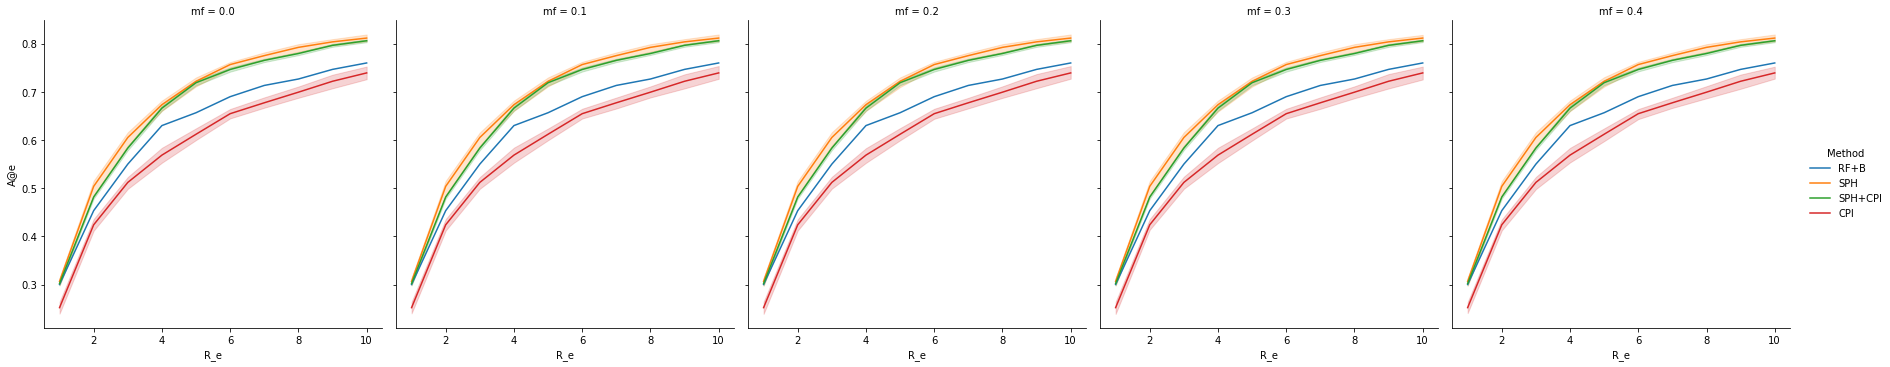

In [4]:
sns.relplot(data=features_df, x="R_e", y="A@e", hue="Method", col="mf", kind="line")

In [28]:
parameters = ["max info loss", "gini", "p value", "n_clusters"]
methods_to_parameters = {
    "SPH+CPI": ["max info loss", "gini", "p value"],
    "SPH": ["max info loss"],
    "KMeans": ["n_clusters"],
    "Birch": ["n_clusters"],
    "GMM": ["n_clusters"],
    "CPI": ["gini", "p value"],
    "RF": [],
    "RF+B": [],
    "RFperGroup": []
}

In [29]:
best_result_df = pd.DataFrame()
for n in features_df["mf"].unique():
    print(n)
    n_features_df = features_df[features_df["mf"] == n]
    # find best parameter for each method
    for method in n_features_df["Method"].unique():
        method_df = n_features_df[n_features_df["Method"] == method]
        #print(method_df)
        first_position_df = method_df[(method_df["R_e"] == 1)]
        best_method_result = first_position_df[first_position_df["A@e"] == first_position_df["A@e"].max()]
        for parameter in methods_to_parameters[method]:
            parameter_value = best_method_result[parameter].values[0]
            #if not parameter_value:
            #    continue
            method_df = method_df[method_df[parameter] == parameter_value]
        print(method_df)
        best_result_df = pd.concat([best_result_df, method_df])
best_result_df["Method"].unique()

0.0
   Method  R_e       A@e      RA@e  Run  max info loss     n    f   mf  \
69    SPH    1  0.316667  1.000000    1           0.35  1050  100  0.0   
70    SPH    2  0.516667  1.387097    1           0.35  1050  100  0.0   
71    SPH    3  0.613333  1.641304    1           0.35  1050  100  0.0   
72    SPH    4  0.680000  1.872549    1           0.35  1050  100  0.0   
73    SPH    5  0.730000  2.086758    1           0.35  1050  100  0.0   
74    SPH    6  0.760000  2.241228    1           0.35  1050  100  0.0   
75    SPH    7  0.780000  2.363248    1           0.35  1050  100  0.0   
76    SPH    8  0.793333  2.457983    1           0.35  1050  100  0.0   
77    SPH    9  0.806667  2.566116    1           0.35  1050  100  0.0   

    n_clusters algorithm  n_components  gini  p value  
69         NaN       NaN           NaN   NaN      NaN  
70         NaN       NaN           NaN   NaN      NaN  
71         NaN       NaN           NaN   NaN      NaN  
72         NaN       NaN       

['SPH', 'RF+B', 'SPH+CPI', 'CPI']
Categories (4, object): ['RF+B' < 'SPH' < 'SPH+CPI' < 'CPI']

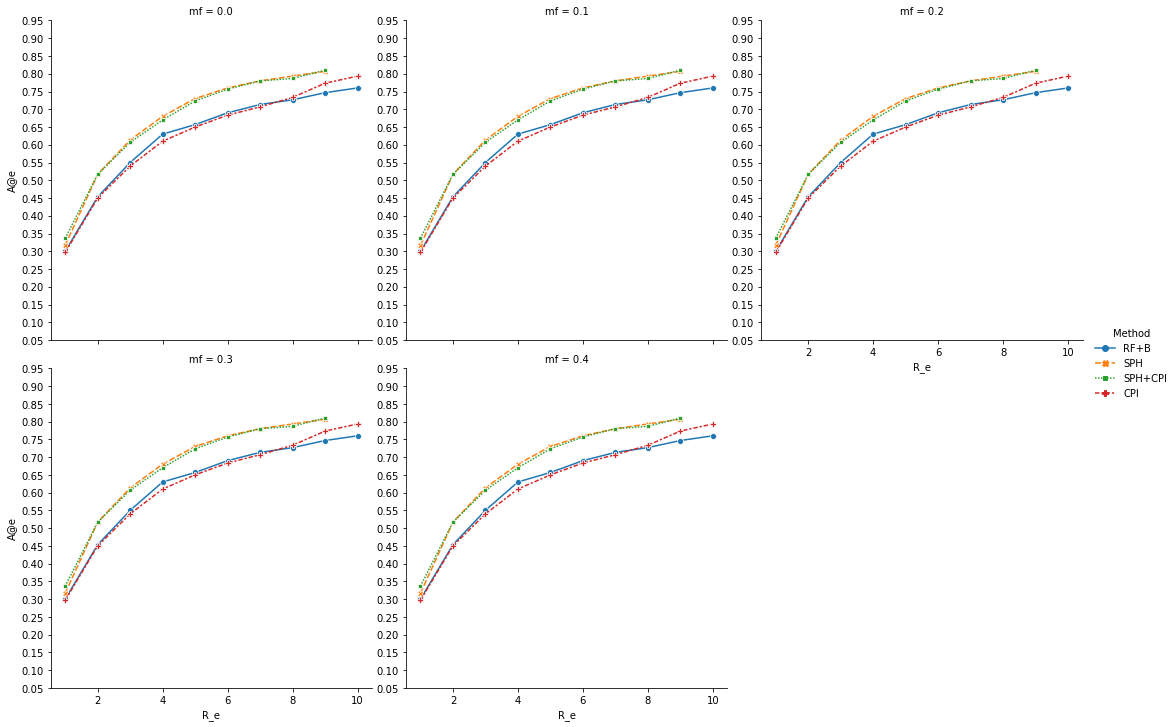

In [30]:
ax = sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF+B", "CPI"])], x="R_e", y="A@e", style="Method",facet_kws={'sharey': False, 'sharex': True}, markers=True,hue="Method", col="mf", kind="line", col_wrap=3)
ax.set(yticks=[x/20 for x in range(1, 20)])

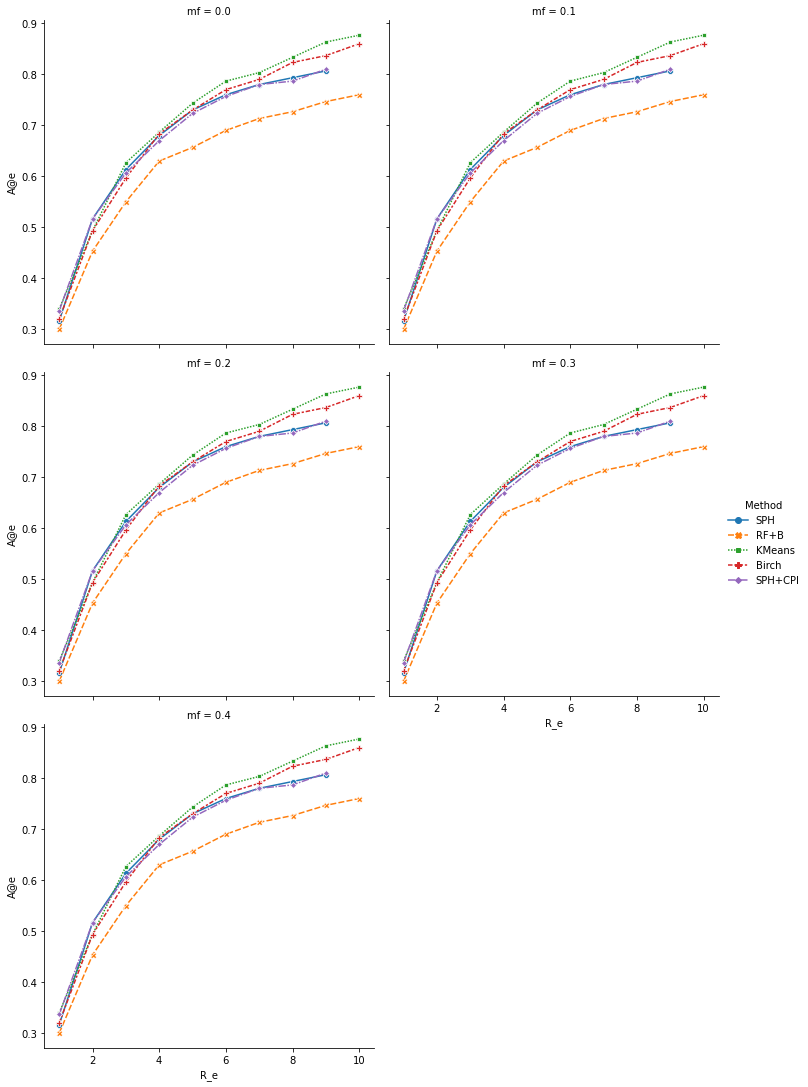

In [26]:
sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF+B", "KMeans", "Birch"])],style="Method", markers=True, x="R_e", y="A@e", hue="Method", col="mf", kind="line", col_wrap=2)

In [11]:
best_parameter_df = pd.DataFrame()
for n in best_result_df["n"].unique():
    #print("--------------------------------------")
    #print(f"n={n}")
    best_n_samples = best_result_df[best_result_df["n"] == n]
    for method in best_n_samples["Method"].unique():
        param_df = best_n_samples[(best_n_samples["Method"] == method) & (best_n_samples["R_e"] == 1)][methods_to_parameters[method]]
        #print(f"Method {method} has best parameters:")
        #print(param_df)
        #print("--------------------------------------")
        param_df["Method"] = method
        param_df["n"] = n
        best_parameter_df = pd.concat([best_parameter_df, param_df])
    
best_parameter_df

,Method,n,max info loss,n_clusters,gini,p value
0,RF,1050,NaN,NaN,NaN,NaN
2390,RF,1050,NaN,NaN,NaN,NaN
4774,RF,1050,NaN,NaN,NaN,NaN
7158,RF,1050,NaN,NaN,NaN,NaN
60,SPH,1050,0.35,NaN,NaN,NaN
2449,SPH,1050,0.35,NaN,NaN,NaN
4834,SPH,1050,0.35,NaN,NaN,NaN
7218,SPH,1050,0.35,NaN,NaN,NaN
80,RF+B,1050,NaN,NaN,NaN,NaN
2467,RF+B,1050,NaN,NaN,NaN,NaN


Text(0, 0.5, 'A@1 Accuracy')

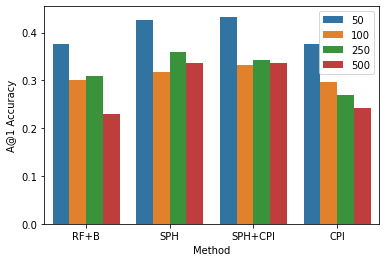

In [21]:
ax = sns.barplot(hue="f", x="Method", y="A@e", data=best_result_df[(best_result_df["Method"].isin(["RF+B","SPH", "SPH+CPI", "CPI"])) & (best_result_df["R_e"] == 1)])
ax.legend(loc="upper right")
ax.set_ylabel("A@1 Accuracy")